In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
%matplotlib inline

In [3]:
train.head()

,Unnamed: 0,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DMAR,DOB_MM,DOB_TT,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,SEX,WTGAIN,ANOMALY,APGAR
0,0,1,1,30.7,0,3657,4,1,1,1227,...,1,2,190,1,2,0,M,41,0,9
1,3,3,1,23.7,0,3140,5,2,1,938,...,2,0,138,1,2,0,F,0,0,9
2,5,4,2,31.3,0,4082,3,1,1,28,...,1,0,200,1,1,0,F,47,0,9
3,6,1,1,23.0,0,3180,3,1,1,341,...,2,0,160,1,1,0,F,10,0,9
4,7,1,1,28.2,0,3230,3,1,1,1615,...,0,0,180,3,1,0,F,29,0,9


In [27]:
train.columns

Index(['Unnamed: 0', 'ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DBWT', 'DLMP_MM',
       'DMAR', 'DOB_MM', 'DOB_TT', 'DOB_WK', 'DWgt_R', 'FAGECOMB', 'FEDUC',
       'FHISPX', 'FRACE6', 'ILLB_R', 'ILOP_R', 'ILP_R', 'IP_GON', 'MAGER',
       'MAGE_IMPFLG', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MM_AICU', 'MRAVE6',
       'MTRAN', 'M_Ht_In', 'NO_INFEC', 'NO_MMORB', 'NO_RISKS', 'PAY_REC',
       'PRECARE', 'PREVIS', 'PRIORDEAD', 'PRIORLIVE', 'PRIORTERM', 'PWgt_R',
       'RDMETH_REC', 'RESTATUS', 'RF_CESARN', 'SEX', 'WTGAIN', 'ANOMALY',
       'APGAR'],
      dtype='object')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484255 entries, 0 to 2484254
Data columns (total 46 columns):
Unnamed: 0     int64
ATTEND         int64
BFACIL         int64
BMI            float64
CIG_0          int64
DBWT           int64
DLMP_MM        int64
DMAR           object
DOB_MM         int64
DOB_TT         int64
DOB_WK         int64
DWgt_R         int64
FAGECOMB       int64
FEDUC          int64
FHISPX         int64
FRACE6         int64
ILLB_R         int64
ILOP_R         int64
ILP_R          int64
IP_GON         object
MAGER          int64
MAGE_IMPFLG    object
MBSTATE_REC    int64
MEDUC          int64
MHISPX         int64
MM_AICU        object
MRAVE6         int64
MTRAN          object
M_Ht_In        int64
NO_INFEC       int64
NO_MMORB       int64
NO_RISKS       int64
PAY_REC        int64
PRECARE        int64
PREVIS         int64
PRIORDEAD      int64
PRIORLIVE      int64
PRIORTERM      int64
PWgt_R         int64
RDMETH_REC     int64
RESTATUS       int64
RF_CESARN      int6

In [31]:
train.describe

<bound method NDFrame.describe of          Unnamed: 0  ATTEND  BFACIL   BMI  CIG_0  DBWT  DLMP_MM DMAR  DOB_MM  \
0                 0       1       1  30.7      0  3657        4    1       1   
1                 3       3       1  23.7      0  3140        5    2       1   
2                 5       4       2  31.3      0  4082        3    1       1   
3                 6       1       1  23.0      0  3180        3    1       1   
4                 7       1       1  28.2      0  3230        3    1       1   
5                 8       1       1  24.7      0  3700        3    1       1   
6                 9       1       1  19.8      0  3430        4    1       1   
7                10       1       1  25.7      0  4130        4    1       1   
8                11       1       1  24.3      0  2755        4    1       1   
9                13       1       1  31.3      0  3810        4    1       1   
10               14       3       1  27.4      0  3150        4    1       1   
11    

In [4]:
train.isnull()

,Unnamed: 0,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DMAR,DOB_MM,DOB_TT,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,SEX,WTGAIN,ANOMALY,APGAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


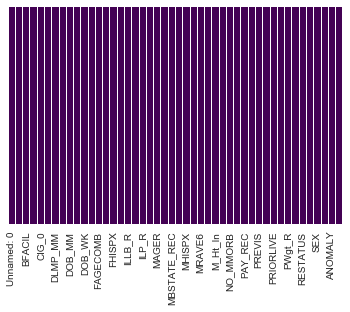

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

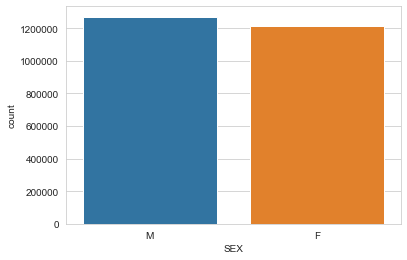

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='SEX',data=train)

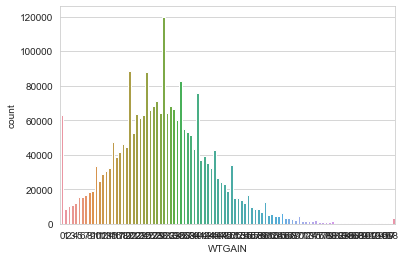

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='WTGAIN',data=train)

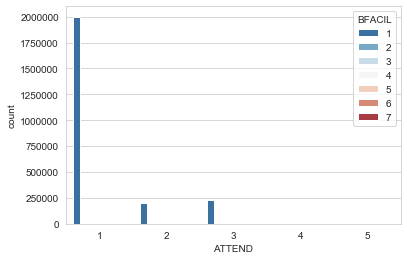

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='ATTEND',hue='BFACIL',data=train,palette='RdBu_r')

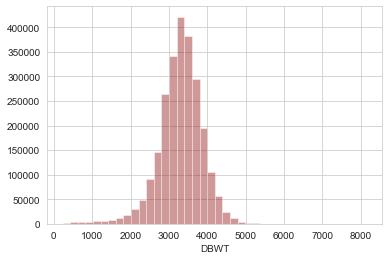

In [25]:
sns.distplot(train['DBWT'].dropna(),kde=False,color='darkred',bins=40)

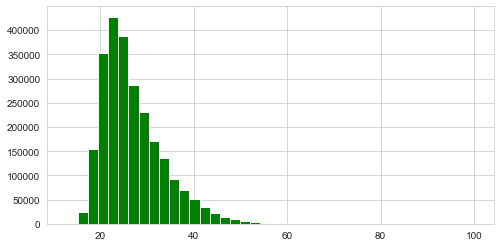

In [29]:
train['BMI'].hist(color='green',bins=40,figsize=(8,4))

Text(0.5, 1.0, 'Reported Confirmed Cases Time Series')

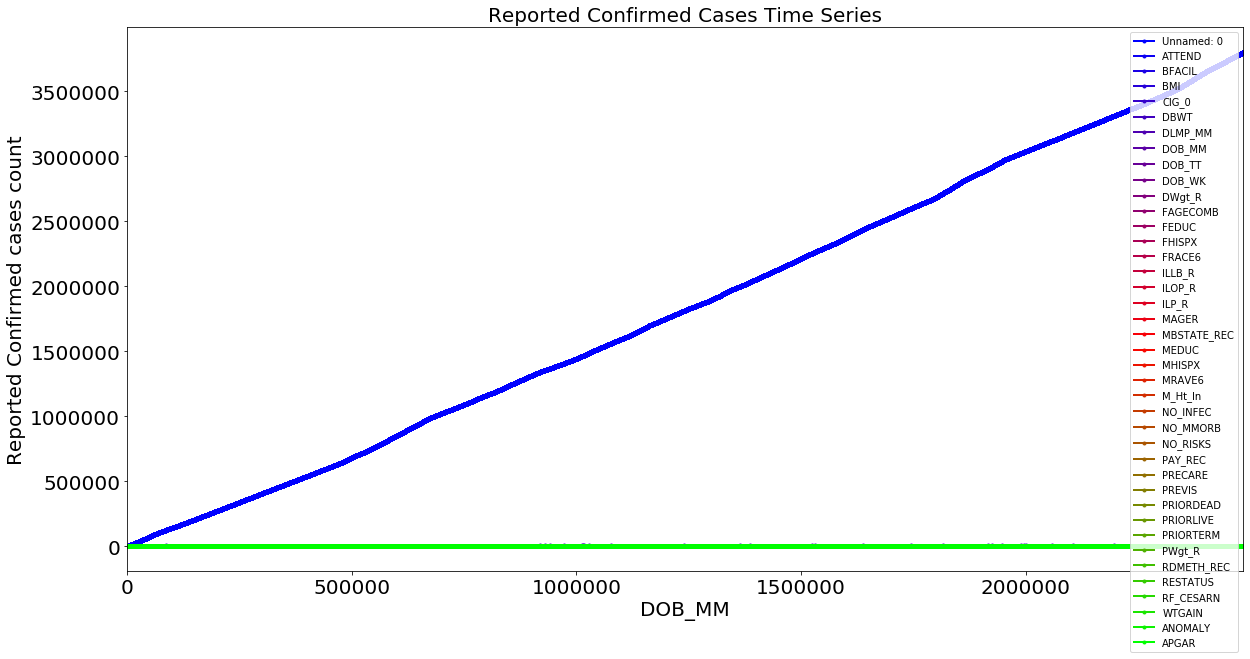

In [4]:
train.plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('DOB_MM', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20)

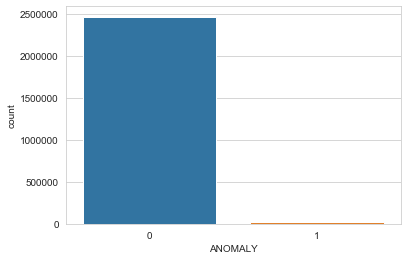

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='ANOMALY',data=train)

In [11]:
import numpy

aggResult=train.groupby(by=['ANOMALY'])['ANOMALY'].agg({'ANOMALY': numpy.size })

C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
aggResult

,ANOMALY
ANOMALY,
0,2462567
1,21688


In [36]:
def countplot(columnname1,columnname2,plotTitle):
    bins = [1,2,3,4,5,6,7,8,9,10]
    plt.figure(figsize = (14,8))
    sns.countplot(x=pd.cut(columnname1,bins), hue = columnname2 , orient = 'h')
    plt.xlabel(columnname1.name)
    plt.yscale('log')
    plt.title(plotTitle)
    plt.grid(True)
    plt.show()
    return

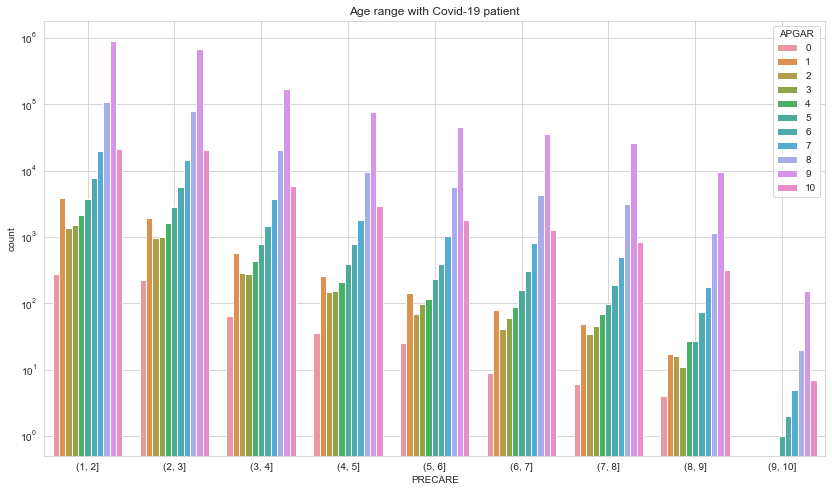

In [37]:
countplot(train["PRECARE"],train["APGAR"],"Age range with Covid-19 patient")